In [1]:
# Load relevant R packages
inLibraries = list('repr','rgdal','spdep')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){           
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

Warning message:
"package 'rgdal' was built under R version 3.4.2"Warning message:
"package 'sp' was built under R version 3.4.2"Warning message:
"package 'spdep' was built under R version 3.4.2"

In [2]:
euro <- readOGR("datasets/european_airports", "EuropeanAirports2006")

OGR data source with driver: ESRI Shapefile 
Source: "datasets/european_airports", layer: "EuropeanAirports2006"
with 1884 features
It has 10 fields


In [3]:
peek <- head(euro@data)

In [4]:
peek

LONGITUDE,LATITUDE,CODE,NAME,CITY,COUNTRY,C_NAME,OUTFLOW,INFLOW,TOTALFLOW
-25170000,36970000,SMA,Vila Do Porto,Santa Maria,PT,Portugal,939.75,939.75,1879.50
-28720000,38520000,HOR,Horta,"Horta, Faial Is.",PT,Portugal,3026.50,3023.50,6050.00
-28330000,38470000,PIX,Pico Island,Pico Island,PT,Portugal,826.75,986.50,1813.25
-27090000,38760000,TER,Lajes,Terceira,PT,Portugal,6621.00,6424.25,13045.25
-25680000,37750000,PDL,Nordela,Ponta Delgada,PT,Portugal,9990.50,10149.00,20139.50
-23170000,64970000,GUU,Grundarf Jordur Airport,Grundarf Jordur,IS,Iceland,0.00,0.00,0.00


In [5]:
summary(euro)

Object of class SpatialPointsDataFrame
Coordinates:
               min      max
coords.x1 -3197096  7077693
coords.x2  4166463 14440216
Is projected: TRUE 
proj4string :
[+proj=merc +lon_0=0 +lat_ts=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m
+no_defs +ellps=WGS84 +towgs84=0,0,0]
Number of points: 1884
Data attributes:
   LONGITUDE            LATITUDE             CODE                     NAME     
 Min.   :-28720000   Min.   :35200000   AAH    :   1   Off-Line Point   : 499  
 1st Qu.:  2830000   1st Qu.:46470000   AAL    :   1   Metropolitan Area:  11  
 Median :  8780000   Median :50565000   AAQ    :   1   Bus Service      :  10  
 Mean   : 10292468   Mean   :50934920   AAR    :   1   Rail Station     :   9  
 3rd Qu.: 15272500   3rd Qu.:54635000   ABB    :   1   Railway Service  :   9  
 Max.   : 63580000   Max.   :78210000   ABC    :   1   Railway Station  :   9  
                                        (Other):1878   (Other)          :1337  
             CITY         COUNTRY            

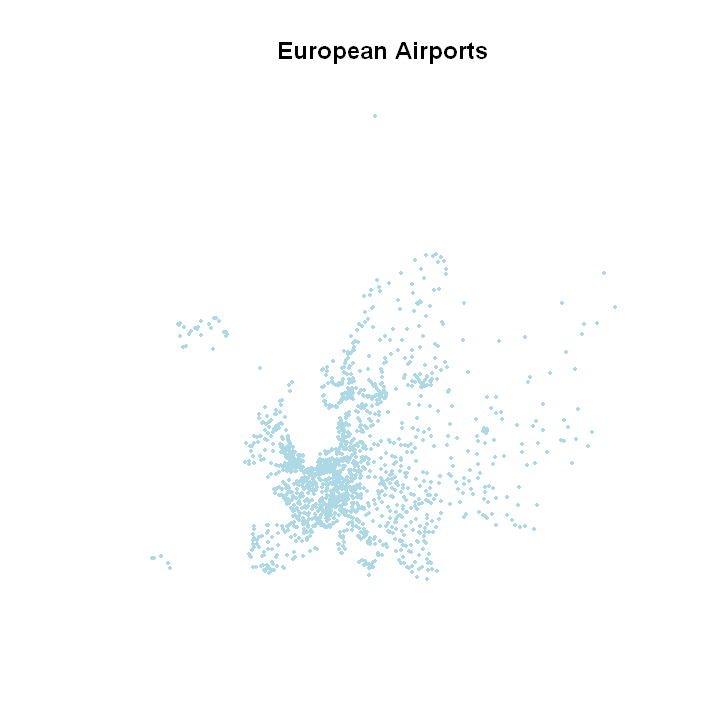

In [9]:
plot(euro, pch = 21, bg = "lightblue", col = "lightblue", 
                lwd = 0.5, cex = 0.4, main = "European Airports")

Retrieve the x,y coordinates associated with each point feature.  

Create a .nb class object that contains a list of neighbors for each point.  

Remember to first determine what distance units are used for this particular dataset. 

In this exercise, a neighorhood for each airport consists of all airports within 200 miles of a given airport. 

Plot the airports and their neighborhoods on a map as lines between the airports.

In [7]:
proj4string(euro)

## JACKY: units are in meters
## 200 miles = 321,869 meters

[1] "+proj=merc +lon_0=0 +lat_ts=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0"

In [8]:
coords <- coordinates(euro)

In [10]:
head(coords)

coords.x1,coords.x2
-2801912,4409227
-3197096,4626532
-3153681,4619450
-3015645,4660597
-2858685,4518007
-2579273,9561715


In [11]:
d1 <- 0 
d2 <- 321869 # 200 miles in meters

In [12]:
euro.nb <- dnearneigh(coords, d1, d2, bounds = c("GE", "LT"))

In [13]:
euro.nb

Neighbour list object:
Number of regions: 1884 
Number of nonzero links: 116588 
Percentage nonzero weights: 3.284672 
Average number of links: 61.88323 
23 regions with no links:
152 324 1730 1760 1788 1790 1815 1818 1822 1829 1830 1837 1840 1841 1842 1843 1846 1856 1860 1881 1882 1883 1884

In [14]:
head(euro.nb)

[[1]]
[1] 5

[[2]]
[1] 3 4

[[3]]
[1] 2 4 5

[[4]]
[1] 2 3 5

[[5]]
[1] 1 3 4

[[6]]
[1]  7  8  9 10 11 12 13 14 15

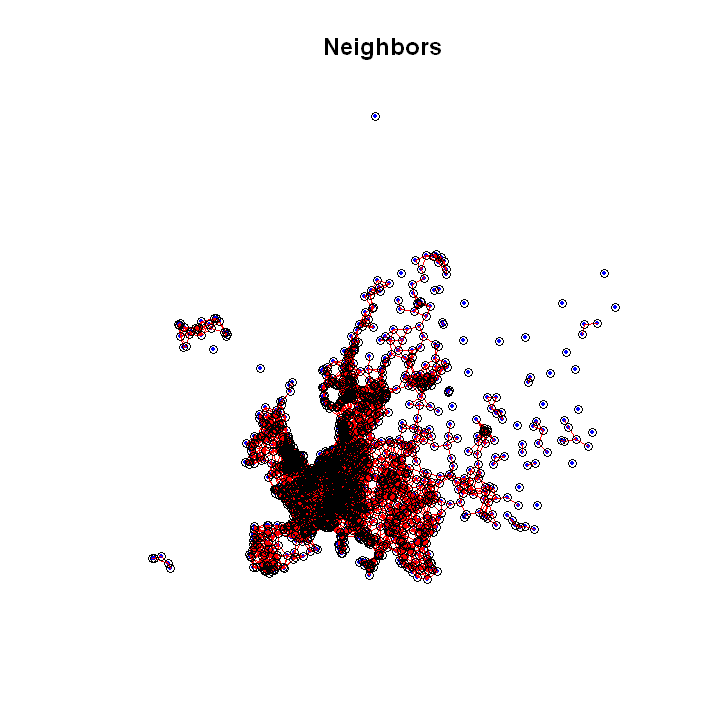

In [15]:
plot(euro, bg = "blue", col = "blue", pch = 21, 
             main = "Neighbors", lwd = 0.5, cex = 0.4)

plot(euro.nb, coords, add = TRUE, col = "red")

Now, consider a second order neighborhood for each airport - those airports at least 200 miles from an airport and within 450 miles of an airport.  Given this neighborhood definition, model the secondary neighbors for each airport.

In [16]:
d1 <- 321869 # 200 miles to meters
d2 <- 724205 # 450 miles to meters

In [17]:
euro.nb2 <- dnearneigh(coords, d1, d2, bounds = c("GE", "LT"))

In [18]:
head(euro.nb2)

[[1]]
[1] 2 3 4

[[2]]
[1] 1 5

[[3]]
[1] 1

[[4]]
[1] 1

[[5]]
[1] 2

[[6]]
[1] 16 17 18 19 20 21 22

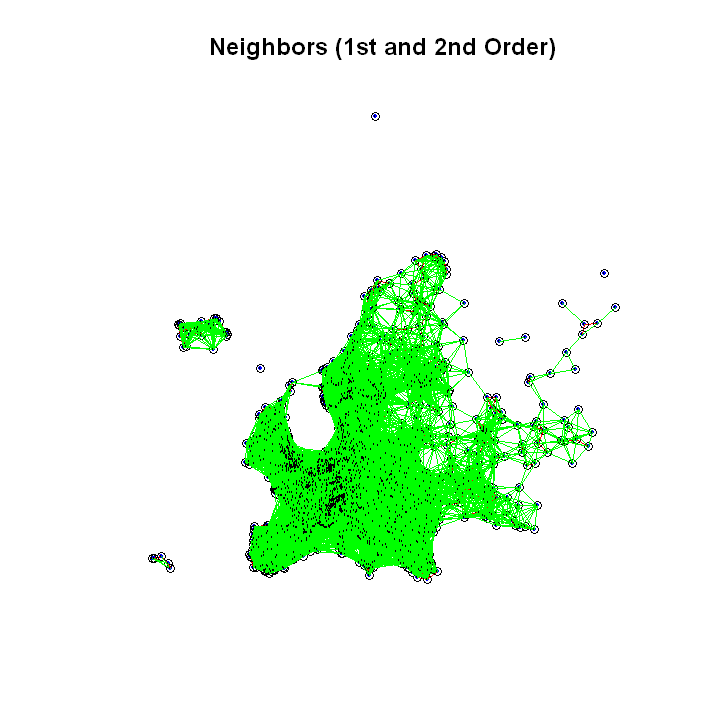

In [19]:
plot(euro, bg = "blue", col = "blue", pch = 21, 
             main = "Neighbors (1st and 2nd Order)", lwd = 0.5, cex = 0.4)

plot(euro.nb, coords, add = TRUE, col = "red", cex = 1)
plot(euro.nb2, coords, add = TRUE, col = "green", lwd = 0.5, cex = 0.2)

### Loopy loop

In [20]:
# first - make a list of list that contains the different radius distances

r1 <- list(start = 0, end = 160934, color = "green") # 0 to 100 miles
r2 <- list(start = 160934, end = 321869, color = "red") # 100 to 200 miles
r3 <- list(start = 321869, end = 482803, color = "blue") # 200 to 300 miles

radiusList <- list(r1, r2, r3)

In [21]:
radiusList

[[1]]
[[1]]$start
[1] 0

[[1]]$end
[1] 160934

[[1]]$color
[1] "green"


[[2]]
[[2]]$start
[1] 160934

[[2]]$end
[1] 321869

[[2]]$color
[1] "red"


[[3]]
[[3]]$start
[1] 321869

[[3]]$end
[1] 482803

[[3]]$color
[1] "blue"

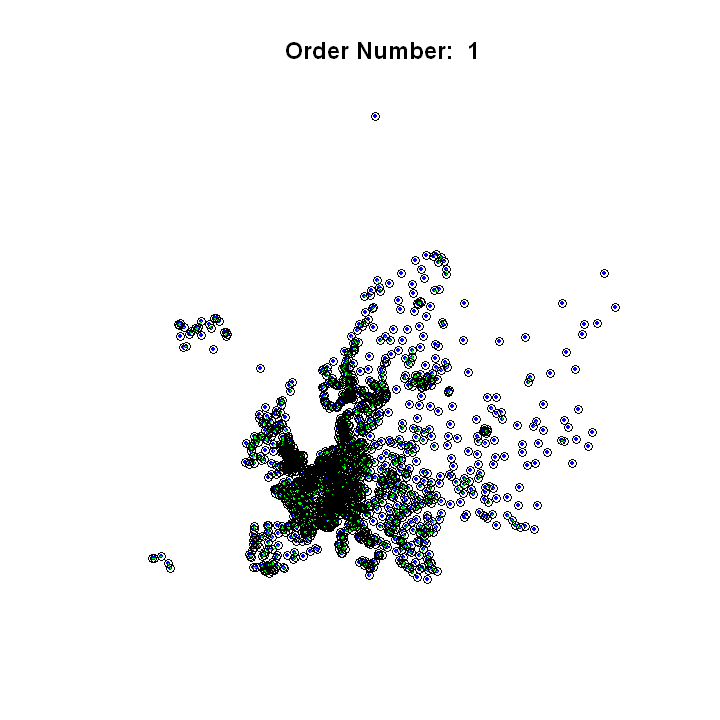

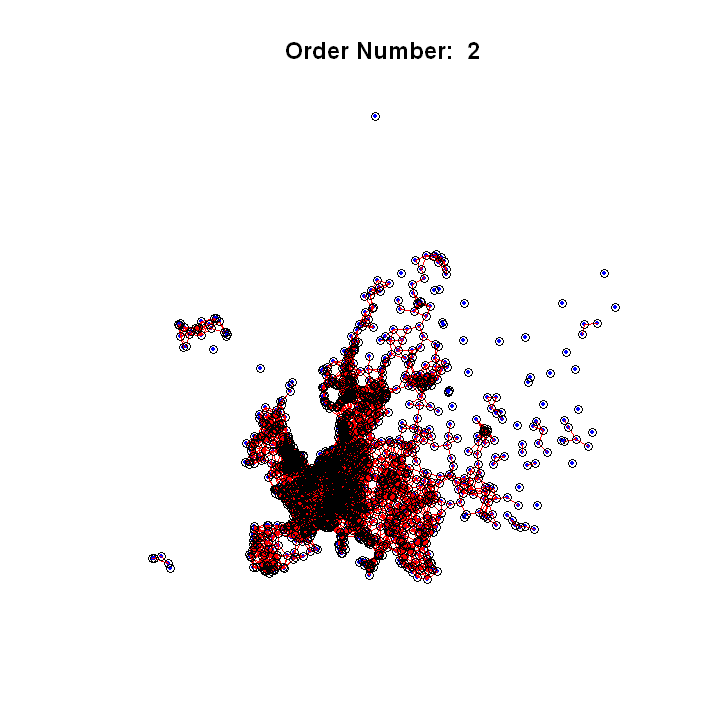

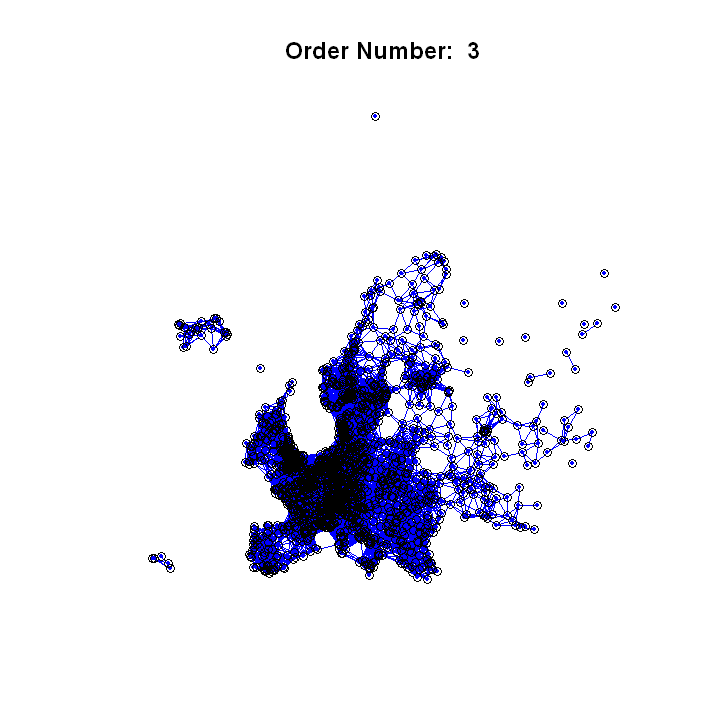

In [22]:
i <- 1

while (i <= 3){
    radius <- unlist(radiusList[i])
    
    start <- as.numeric(unname(radius["start"]))
    end <- as.numeric(unname(radius["end"]))
    color <- unname(radius["color"])
    
    nb <- dnearneigh(coords, start, end, bounds = c("GE", "LT"))
    
    plot(euro, bg = "blue", col = "blue", pch = 21, 
             main = paste("Order Number: ", i), lwd = 0.5, cex = 0.4)

    plot(nb, coords, add = TRUE, col = color, cex = 1)
    
    i <- i + 1
}